In [1]:
!bash getdata.sh

=== Acquiring datasets ===
---
- Downloading WikiText-2 (WT2)
- Downloading WikiText-103 (WT2)
--2023-03-13 12:28:14--  https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.231.64, 52.216.212.152, 52.217.135.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.231.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190229076 (181M) [application/zip]
Saving to: ‘wikitext-103-v1.zip’

wikitext-103-v1.zip 100%[===================>] 181.42M  1.43MB/s    in 22m 36s 

2023-03-13 12:50:51 (137 KB/s) - ‘wikitext-103-v1.zip’ saved [190229076/190229076]

- Downloading enwik8 (Character)
--2023-03-13 12:50:59--  http://mattmahoney.net/dc/enwik8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36445475 (35M) [application/zip]
Saving to: ‘e

In [2]:
%cd pytorch

/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch


In [4]:
!./run_wt103_base.sh train --num_mem_tokens 160

Run training...
./run_wt103_base.sh: line 5: python: command not found


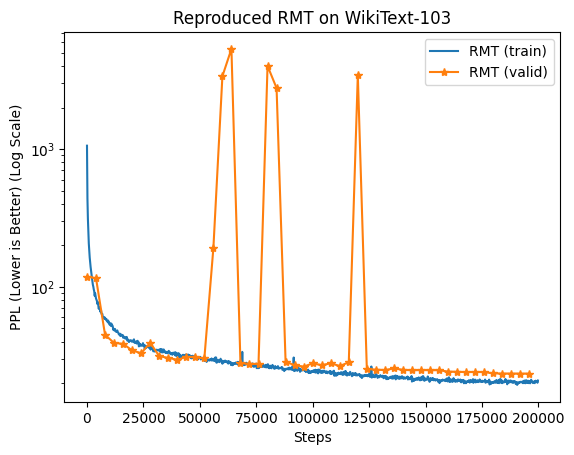

In [3]:
import os

file_path = "/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch/LM-TFM-wt103_RMT/20230313-151556/log.txt"

with open(file_path) as f:
    lines = f.readlines()

required_lines_train = []
for i in lines:
    # if "| Eval " in i :
    if "| epoch " in i :
        i = float(i.split("ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_train.append(i)

required_lines_val = []
for i in lines:
    if "| Eval " in i :
    # if "| epoch " in i :
        i = float(i.split("valid ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_val.append(i)

import matplotlib.pyplot as plt
import numpy as np

plt.yscale("log")  
plt.plot(np.arange(0,200000, 200), required_lines_train,label="RMT (train)")
# plt.plot(np.arange(0,200000, 200), required_lines_train,"-o",label="RMT (train)")
plt.plot(np.arange(0,200000, 4000), required_lines_val,"-*",label="RMT (valid)")
plt.xlabel("Steps")
plt.ylabel("PPL (Lower is Better) (Log Scale)")
plt.legend()
plt.title("Reproduced RMT on WikiText-103")
plt.savefig("RMT_reprod.pdf", format="pdf", bbox_inches="tight")
plt.show()

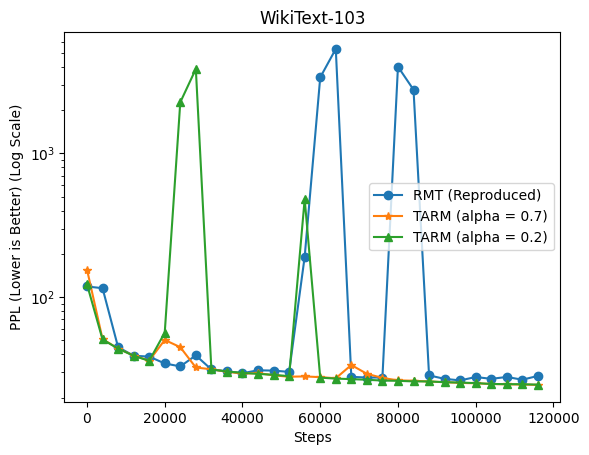

In [26]:
import os

file_path = "/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch/LM-TFM_TARM_0.2-wt103/20230414-141855/log.txt"

with open(file_path) as f:
    lines = f.readlines()

required_lines_02 = []
for i in lines:
    if "| Eval " in i :
    # if "| epoch " in i :
        i = float(i.split("valid ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_02.append(i)

file_path = "/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch/LM-TFM_TARM_0.7-wt103/20230414-141714/log.txt"

with open(file_path) as f:
    lines = f.readlines()

required_lines_07 = []
for i in lines:
    if "| Eval " in i :
    # if "| epoch " in i :
        i = float(i.split("valid ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_07.append(i)

import matplotlib.pyplot as plt
import numpy as np

plt.yscale("log")  
# plt.plot(np.arange(len(required_lines_val[:30])*4000, 4000), "-o", required_lines_val[:30],label="RMT")
# plt.plot(np.arange(len(required_lines_07)*4000, 4000),  "-*",  required_lines_07,label="TARM alpha = 0.7")
# plt.plot(np.arange(len(required_lines_02)*4000, 4000), "-*", required_lines_02,label="TARM alpha = 0.2")

plt.plot(np.arange(0,len(required_lines_07)*4000, 4000), required_lines_val[:30], "-o",label="RMT (Reproduced)")
plt.plot(np.arange(0,len(required_lines_07)*4000, 4000), required_lines_07[:30], "-*",label="TARM (alpha = 0.7)")
plt.plot(np.arange(0,len(required_lines_07)*4000, 4000), required_lines_02[:30], "-^",label="TARM (alpha = 0.2)")

# plt.plot(np.arange(0,200000, 200), required_lines_train,"-o",label="RMT (train)")
# plt.plot(np.arange(0,200000, 4000), required_lines_val,"-*",label="RMT (valid)")
plt.xlabel("Steps")
plt.ylabel("PPL (Lower is Better) (Log Scale)")
plt.legend()
plt.title("WikiText-103")
plt.savefig("RMT_ablation.pdf", format="pdf", bbox_inches="tight")
plt.show()

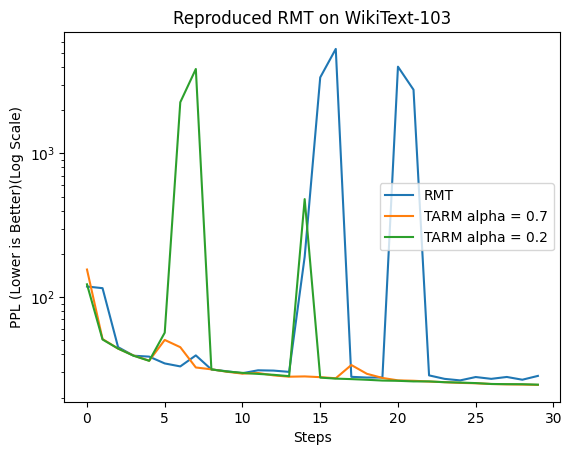

In [17]:
import os

file_path = "/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch/LM-TFM_TARM_0.2-wt103/20230414-141855/log.txt"

with open(file_path) as f:
    lines = f.readlines()

required_lines_02 = []
for i in lines:
    if "| Eval " in i :
    # if "| epoch " in i :
        i = float(i.split("valid ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_02.append(i)

file_path = "/raid/rahulvigneswaran/projects/VisualComputing/lm-rmt/pytorch/LM-TFM_TARM_0.7-wt103/20230414-141714/log.txt"

with open(file_path) as f:
    lines = f.readlines()

required_lines_07 = []
for i in lines:
    if "| Eval " in i :
    # if "| epoch " in i :
        i = float(i.split("valid ppl ")[-1].strip("\n").replace(" ", ""))
        required_lines_07.append(i)

import matplotlib.pyplot as plt
import numpy as np

plt.yscale("log")  
plt.plot(np.arange(len(required_lines_val[:30])), required_lines_val[:30],label="RMT")
plt.plot(np.arange(len(required_lines_07)),  required_lines_07,label="TARM alpha = 0.7")
plt.plot(np.arange(len(required_lines_02)), required_lines_02,label="TARM alpha = 0.2")

# plt.plot(np.arange(0,200000, 200), required_lines_train,"-o",label="RMT (train)")
# plt.plot(np.arange(0,200000, 4000), required_lines_val,"-*",label="RMT (valid)")
plt.xlabel("Steps")
plt.ylabel("PPL (Lower is Better)(Log Scale)")
plt.legend()
plt.title("Reproduced RMT on WikiText-103")
# plt.savefig("RMT_reprod.pdf", format="pdf", bbox_inches="tight")
plt.show()

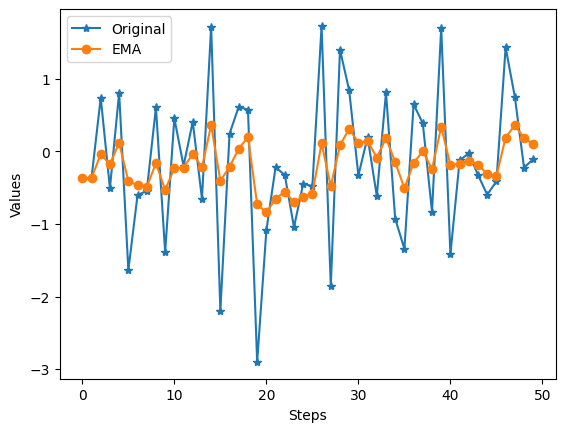

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import torch

mu = 0.7

all = []
all_avg = []
for i in range(50):
  mem_token = torch.randn((1))

  if i == 0:
    mem_token_ema = mem_token

  mem_token_ema = mu * mem_token_ema + (1-mu) * mem_token
  all.append(mem_token.item())
  all_avg.append(mem_token_ema.item())


plt.plot(np.arange(len(all)), all, "-*", label="Original")
plt.plot(np.arange(len(all)), all_avg, "-o", label="EMA")
plt.xlabel("Steps")
plt.ylabel("Values")
plt.legend()
# plt.title("Reproduced RMT on WikiText-103")
plt.savefig("EMA.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>